# Modèles de prédiction

In [1]:
import pandas as pd
from pathlib import Path
from ase.io import read
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))

from utils import generate_csv,create_dataframe_from_xyz_files,create_X_y_from_dataframe




In [2]:
csv_path = "../../data/energies/train.csv"
path_data = "../../data/atoms/train"
df_train=create_dataframe_from_xyz_files(path_data,csv_path)
X,y=create_X_y_from_dataframe(df_train)


Mean Squared Error: 5.335521815695287
Root Mean Squared Error: 2.3098748484918588


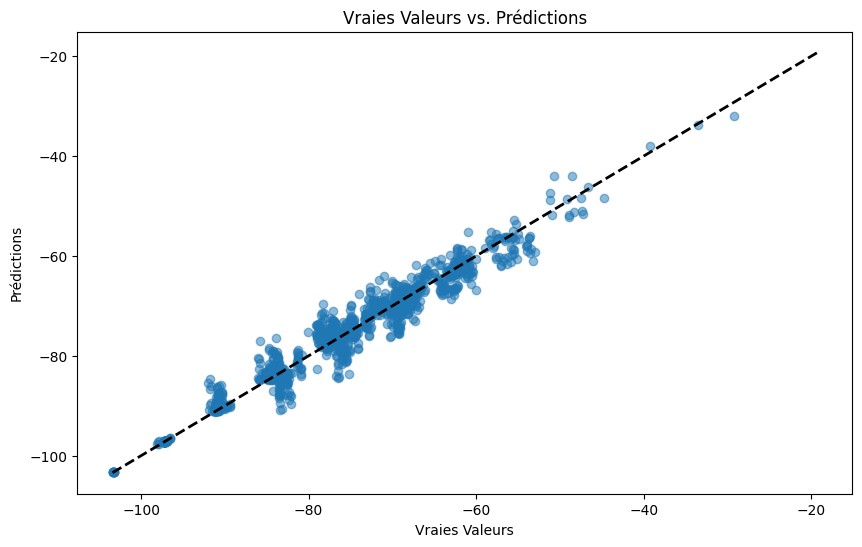

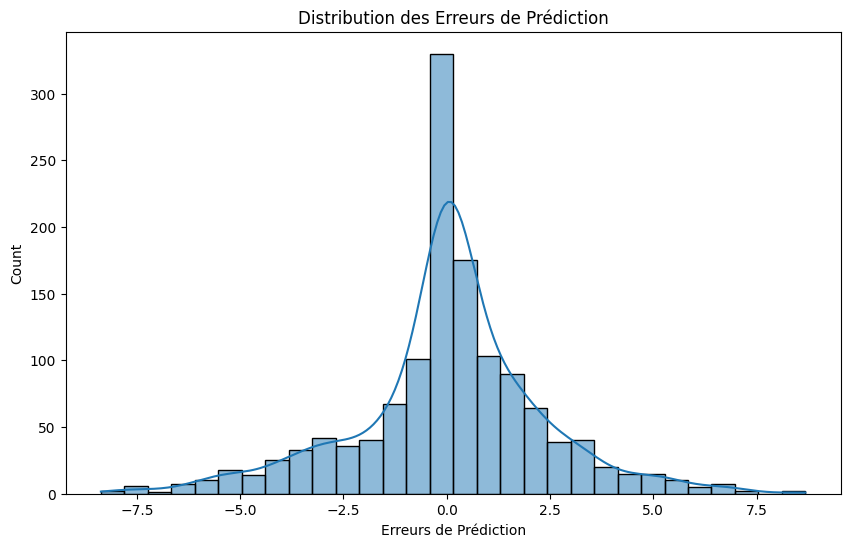

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Vraies Valeurs vs. Prédictions')
plt.show()

errors = y_pred - y_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Erreurs de Prédiction')
plt.title('Distribution des Erreurs de Prédiction')
plt.show()


In [4]:
path_test = "../../data/atoms/test"
df_test = create_dataframe_from_xyz_files(path_test,None)
X_test,_=create_X_y_from_dataframe(df_test,test=True)
y_pred_test = model.predict(X_test)
generate_csv(df_test['id'],y_pred_test,'random_forest')


In [5]:
import numpy as np
from ase.io import read
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

energy_data = energy_data = pd.read_csv(csv_path)

def extract_invariant_features_from_xyz(file_path):
    atoms = read(file_path)

    # Centrer les positions des atomes (invariance par translation)
    positions = atoms.get_positions()
    center_of_mass = np.mean(positions, axis=0)
    centered_positions = positions - center_of_mass

    # Calculer les distances interatomiques (invariance par rotation)
    distances = []
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            distances.append(np.linalg.norm(centered_positions[i] - centered_positions[j]))

    # Caractéristiques basées sur les distances
    mean_distance = np.mean(distances)
    max_distance = np.max(distances)
    min_distance = np.min(distances)

    # Caractéristiques basées sur les types d'atomes (invariance par permutation)
    atom_types = atoms.get_chemical_symbols()
    unique_types, counts = np.unique(atom_types, return_counts=True)
    type_counts = {type_: count for type_, count in zip(unique_types, counts)}

    # Retourner les caractéristiques sous forme de tableau
    features = np.array([
        len(atoms),
        mean_distance,
        max_distance,
        min_distance,
        *list(type_counts.values())
    ])

    return features


X = []
y = []

data_dir = Path("../../data/atoms/train")

xyz_files = list(data_dir.glob("*.xyz"))

for xyz_file in xyz_files:
    molecule_id = xyz_file.stem

    numeric_id = int(molecule_id.split('_')[-1])

    # Vérifiez si l'identifiant numérique de la molécule est dans le fichier CSV
    energy = energy_data.loc[energy_data['id'] == numeric_id, 'energy'].values
    if len(energy) > 0:
        features = extract_invariant_features_from_xyz(xyz_file)
        X.append(features)
        y.append(energy[0])
        #print(f"Molécule {molecule_id} chargée avec succès avec énergie {energy[0]}.")
    else:
        print(f"Aucune énergie trouvée pour la molécule {molecule_id}.")

X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


/tmp/ipykernel_10899/382165132.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


ValueError: setting an array element with a sequence.

Mean Squared Error: 6.179632420880832
Root Mean Squared Error: 2.4858866468286185


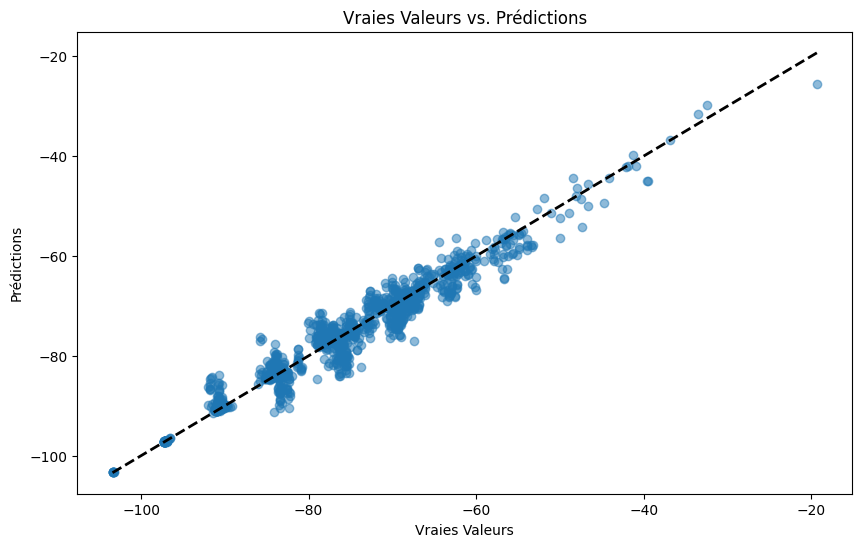

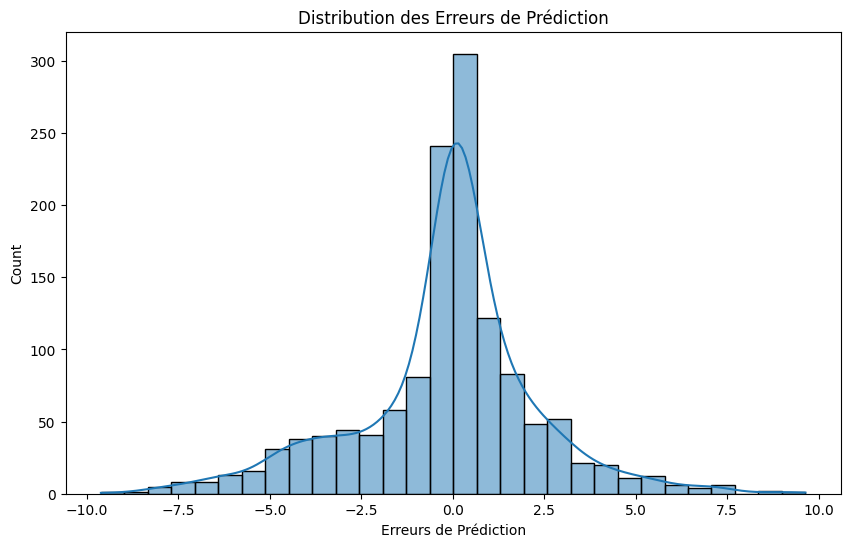

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Vraies Valeurs vs. Prédictions')
plt.show()

errors = y_pred - y_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Erreurs de Prédiction')
plt.title('Distribution des Erreurs de Prédiction')
plt.show()
